# Problem Statement:

### A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount,Required Loan Term, Credit History and others.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option("display.max_columns",50)

# Importing Dataset and getting a View

In [2]:
train_df = pd.read_csv("training_set.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_df.shape

(614, 13)

In [5]:
test_df = pd.read_csv("testing_set.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test_df.shape

(367, 12)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [8]:
train_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Dealing with Null Values

In [9]:
train_df.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
list(train_df.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [12]:
train_df["Credit_History"] = train_df["Credit_History"].fillna(0)
test_df["Credit_History"] = test_df["Credit_History"].fillna(0)

In [13]:
train_df["Credit_History"] = train_df["Credit_History"].astype(str)
test_df["Credit_History"] = test_df["Credit_History"].astype(str)

In [14]:
for i in train_df.columns:
    if train_df[i].dtype == 'object':
        train_df[i] = train_df[i].fillna(train_df[i].mode()[0])
    else:
        train_df[i] = train_df[i].fillna(train_df[i].mean())

In [15]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
for i in test_df.columns:
    if test_df[i].dtype == 'object':
        test_df[i] = test_df[i].fillna(test_df[i].mode()[0])
    else:
        test_df[i] = test_df[i].fillna(test_df[i].mean())

In [17]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [18]:
test_df.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           145
Loan_Amount_Term      13
Credit_History         2
Property_Area          3
dtype: int64

In [19]:
train_df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# EDA

In [20]:
train_df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

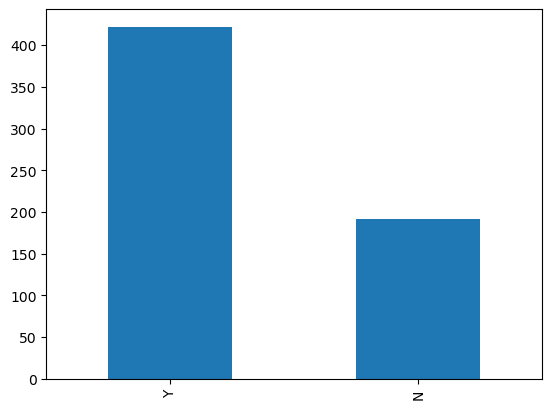

In [21]:
train_df.Loan_Status.value_counts().plot(kind='bar')

# Outlier Treatment

In [23]:
def catcon(df):
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    return cat,con 

In [24]:
cat,con = catcon(train_df)

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=pd.DataFrame(ss.fit_transform(train_df[con]),columns=con)

In [26]:
outliers=[]
for i in con:
    outliers.extend(df1[(df1[i]<-3)|(df1[i]>3)].index)

In [27]:
out=np.unique(outliers)
len(out)

37

In [28]:
train_df=train_df.drop(index=out,axis=0)

In [29]:
train_df.shape

(577, 13)

In [30]:
train_df.index=range(0,577,1)

In [31]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


# Checking Skew

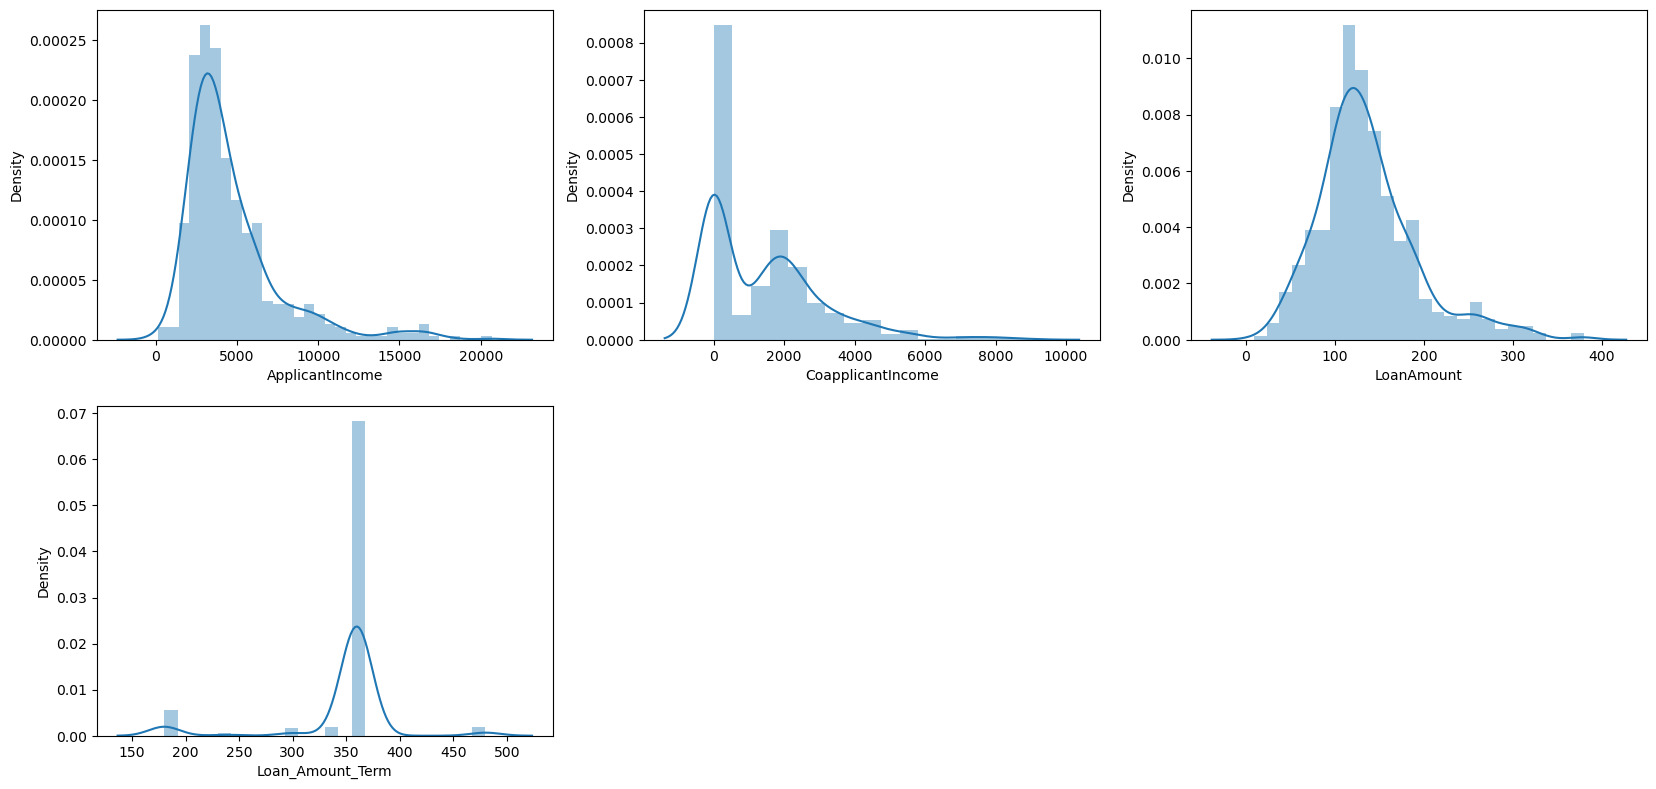

In [32]:
plt.figure(figsize = (20,30))
x = 1
for i in con:
    plt.subplot(6,3,x)
    sns.distplot(train_df[i])
    x += 1

In [33]:
train_df.nunique()

Loan_ID              577
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      474
CoapplicantIncome    274
LoanAmount           185
Loan_Amount_Term       6
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [34]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


# Chi Square Test (relation between two catogorical variables)

In [35]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [36]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [37]:
train_df.Loan_Status.value_counts()

Y    398
N    179
Name: Loan_Status, dtype: int64

In [38]:
train_df.Gender.value_counts()

Male      470
Female    107
Name: Gender, dtype: int64

In [39]:
Q = pd.crosstab(train_df.Loan_Status,train_df.Gender)
Q

Gender,Female,Male
Loan_Status,,
N,35,144
Y,72,326


In [40]:
from scipy.stats import chi2_contingency
a,b,c,d = chi2_contingency(Q)

In [41]:
a

0.09143755143834384

In [42]:
def chisquare(cat1,cat2,df):
    import pandas as pd
    Q = pd.crosstab(df[cat1],df[cat2])
    from scipy.stats import chi2_contingency
    a,b,c,d = chi2_contingency(Q)
    return a

In [43]:
chisquare("Loan_Status","Gender",train_df)

0.09143755143834384

In [44]:
cat,con = catcon(train_df)

In [45]:
cat.remove("Loan_ID")
cat.remove("Loan_Status")

In [46]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [47]:
for i in cat:
    e = chisquare(i,"Loan_Status",train_df)
    e = round(e,2)
    print("Loan_Status ~",i,"--->",e)

Loan_Status ~ Gender ---> 0.09
Loan_Status ~ Married ---> 4.18
Loan_Status ~ Dependents ---> 1.95
Loan_Status ~ Education ---> 4.49
Loan_Status ~ Self_Employed ---> 0.25
Loan_Status ~ Credit_History ---> 119.38
Loan_Status ~ Property_Area ---> 12.13


# Important Columns :

## Married , Education , Loan_Amount_Term , Credit_History , Property_Area

In [48]:
train_df[['ApplicantIncome','CoapplicantIncome']].head()

,ApplicantIncome,CoapplicantIncome
0,5849.00000,0.0
1,5405.54085,1508.0
2,3000.00000,0.0
3,2583.00000,2358.0
4,6000.00000,0.0


In [49]:
train_df["Total"] = train_df.ApplicantIncome + train_df.CoapplicantIncome
train_df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y,5849.00000
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N,6913.54085
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y,3000.00000
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y,4941.00000
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y,6000.00000


In [50]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
Total                float64
dtype: object

In [51]:
cat,con = catcon(train_df)

In [52]:
train_df[con].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total
0,5849.00000,0.0,146.412162,360.0,5849.00000
1,5405.54085,1508.0,128.000000,360.0,6913.54085
2,3000.00000,0.0,66.000000,360.0,3000.00000
3,2583.00000,2358.0,120.000000,360.0,4941.00000
4,6000.00000,0.0,141.000000,360.0,6000.00000


<Axes: xlabel='Total', ylabel='Density'>

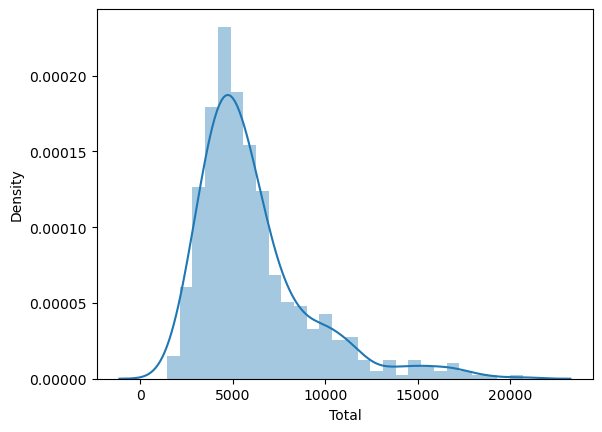

In [53]:
sns.distplot(train_df.Total)

<Axes: xlabel='Total', ylabel='Density'>

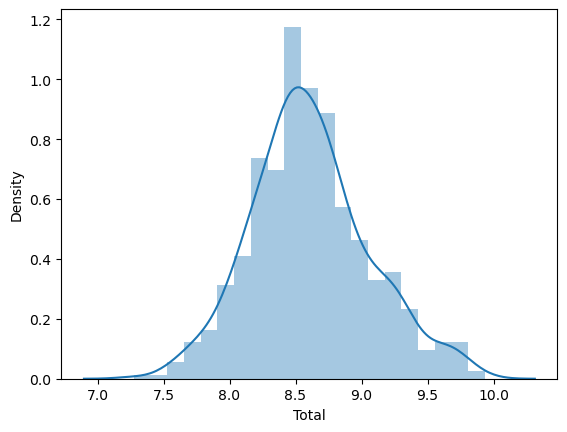

In [54]:
import numpy as np
sns.distplot(np.log(train_df.Total))

In [55]:
train_df['Log_Total'] = np.log(train_df.Total)

In [56]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total,Log_Total
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y,5849.00000,8.674026
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N,6913.54085,8.841237
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y,3000.00000,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y,4941.00000,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y,6000.00000,8.699515


In [57]:
col_to_drop = ["Loan_ID","Gender","Self_Employed","ApplicantIncome","CoapplicantIncome","Total"]

In [58]:
df1 = train_df.drop(labels=col_to_drop,axis=1)

In [59]:
df1.head()

,Married,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Log_Total
0,No,0,Graduate,146.412162,360.0,1.0,Urban,Y,8.674026
1,Yes,1,Graduate,128.000000,360.0,1.0,Rural,N,8.841237
2,Yes,0,Graduate,66.000000,360.0,1.0,Urban,Y,8.006368
3,Yes,0,Not Graduate,120.000000,360.0,1.0,Urban,Y,8.505323
4,No,0,Graduate,141.000000,360.0,1.0,Urban,Y,8.699515


# Problem Statement

## 1.)Check eligibility of the Customer given the inputs described above

# Splitting Dataset into X and Y variable

In [60]:
X=df1.drop(labels=["Loan_Status"],axis=1)
Y=df1[["Loan_Status"]]

In [61]:
cat,con = catcon(X)

In [62]:
cat

['Married', 'Dependents', 'Education', 'Credit_History', 'Property_Area']

In [63]:
con

['LoanAmount', 'Loan_Amount_Term', 'Log_Total']

# Data Preprocessing

In [64]:
from sklearn.preprocessing import MinMaxScaler
Global_MS = MinMaxScaler()
X1=pd.DataFrame(Global_MS.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)
X_new = Xnew

In [65]:
X_new

,LoanAmount,Loan_Amount_Term,Log_Total,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.370383,0.6,0.525910,1,0,1,0,0,0,1,0,0,1,0,0,1
1,0.320755,0.6,0.588712,0,1,0,1,0,0,1,0,0,1,1,0,0
2,0.153639,0.6,0.275147,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0.299191,0.6,0.462548,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0.355795,0.6,0.535483,1,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,0.167116,0.6,0.262414,1,0,1,0,0,0,1,0,0,1,1,0,0
573,0.083558,0.0,0.393020,0,1,0,0,0,1,1,0,0,1,1,0,0
574,0.657682,0.6,0.657902,0,1,0,1,0,0,1,0,0,1,0,0,1
575,0.479784,0.6,0.623427,0,1,0,0,1,0,1,0,0,1,0,0,1


In [66]:
Y

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
572,Y
573,Y
574,Y
575,Y


In [67]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [68]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [69]:
Xnew.head()

,LoanAmount,Loan_Amount_Term,Log_Total,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.370383,0.6,0.525910,1,0,1,0,0,0,1,0,0,1,0,0,1
1,0.320755,0.6,0.588712,0,1,0,1,0,0,1,0,0,1,1,0,0
2,0.153639,0.6,0.275147,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0.299191,0.6,0.462548,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0.355795,0.6,0.535483,1,0,1,0,0,0,1,0,0,1,0,0,1


In [70]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

# Model 1 (Logistic Regression)

In [71]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

In [73]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

In [74]:
from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,tr_pred),2)
ts_acc = round(accuracy_score(ytest,ts_pred),2)
tr_acc,ts_acc

(0.77, 0.82)

## Logistic Regression


## Training accuracy = 0.77


## Testing accuracy = 0.82

# Model 2 (Decision Tree classification)

In [75]:
X_new1 = X[con].join(pd.get_dummies(X[cat]))

In [76]:
X_new1.head(3)

,LoanAmount,Loan_Amount_Term,Log_Total,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,146.412162,360.0,8.674026,1,0,1,0,0,0,1,0,0,1,0,0,1
1,128.000000,360.0,8.841237,0,1,0,1,0,0,1,0,0,1,1,0,0
2,66.000000,360.0,8.006368,0,1,1,0,0,0,1,0,0,1,0,0,1


In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_new1,Y,test_size=0.2,random_state=21)

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42,criterion="entropy")
model = dtc.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = round(accuracy_score(ytrain,pred_tr),2)
ts_acc = round(accuracy_score(ytest,pred_ts),2)
tr_acc,ts_acc

(1.0, 0.72)

In [79]:
def tree(mo):
    model = mo.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = round(accuracy_score(ytrain,pred_tr),2)
    ts_acc = round(accuracy_score(ytest,pred_ts),2)
    return tr_acc,ts_acc

In [80]:
tr = []
ts = []
for i in range(2,20,1):
    dtc = DecisionTreeClassifier(random_state=42,max_depth=i)
    tra,tsa = tree(dtc)
    tr.append(tra)
    ts.append(tsa)

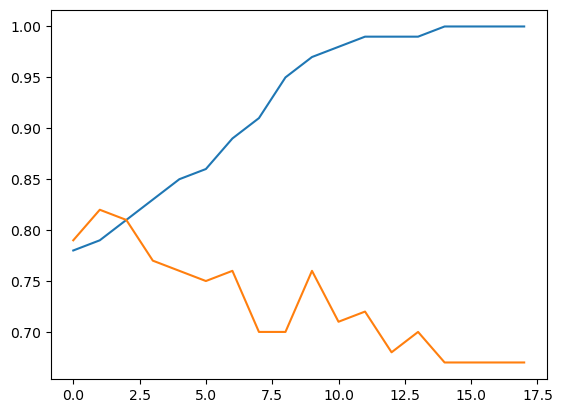

In [81]:
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [82]:
dtc = DecisionTreeClassifier(random_state=42,max_depth=4)
tra,tsa = tree(dtc)

In [83]:
tra,tsa

(0.81, 0.81)

## Decision Tree With max_depth 4 gives error:

## training accuracy = 0.81

## testing accuracy = 0.81

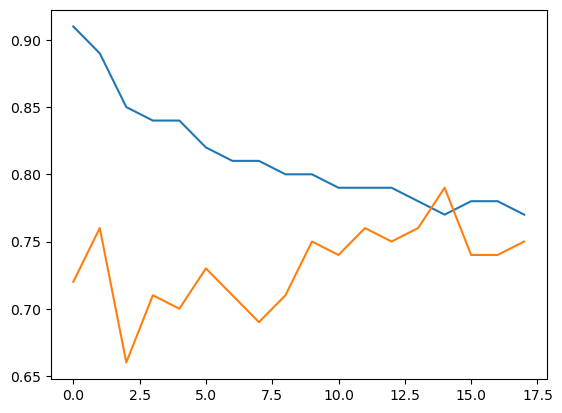

In [84]:
tr = []
ts = []
for i in range(2,20,1):
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    tra,tsa = tree(dtc)
    tr.append(tra)
    ts.append(tsa)
    
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [85]:
dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=3)
tra,tsa = tree(dtc)

In [86]:
tra,tsa

(0.89, 0.76)

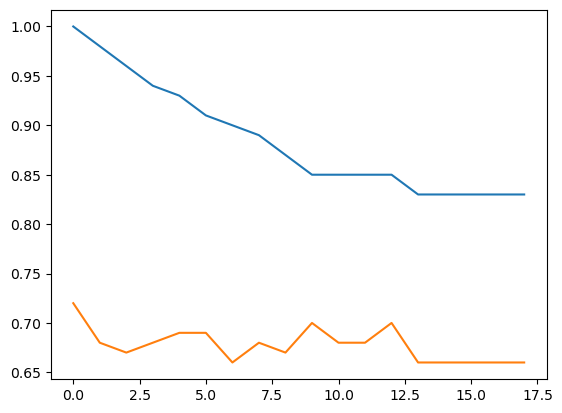

In [87]:
tr = []
ts = []
for i in range(2,20,1):
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    tra,tsa = tree(dtc)
    tr.append(tra)
    ts.append(tsa)
    
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [88]:
dtc = DecisionTreeClassifier(random_state=21,min_samples_split=11)
tra,tsa = tree(dtc)
tra,tsa

(0.85, 0.7)

# Best Result we have using decision tree are:

## Decision Tree With max_depth 4 gives error:

### training accuracy = 0.81

### testing accuracy = 0.81

# Model 3 (Knn Model)

In [89]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=15,oob_score=True)
tree(rfc)

(0.99, 0.72)

In [91]:
rfc.oob_score_

0.6746203904555315

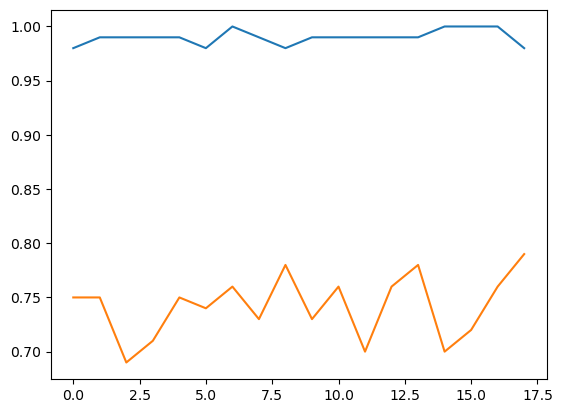

In [92]:
tr = []
ts = []
for i in range(2,20,1):
    rfc = RandomForestClassifier(n_estimators=15,oob_score=True)
    tra,tsa = tree(rfc)
    tr.append(tra)
    ts.append(tsa)
    
import matplotlib.pyplot as plt
plt.plot(tr)
plt.plot(ts)

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5,oob_score=True)
tree(rfc)

(0.97, 0.7)

# Ada Boosting

In [94]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2),n_estimators=15)
tree(abc)

(0.83, 0.72)

In [95]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total,Log_Total
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y,5849.00000,8.674026
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N,6913.54085,8.841237
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y,3000.00000,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y,4941.00000,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y,6000.00000,8.699515


# Final Model

In [96]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [97]:
dtc = DecisionTreeClassifier(random_state=42,max_depth=4)
model = dtc.fit(xtrain,ytrain)
tra,tsa = tree(model)
tra,tsa

(0.81, 0.81)

In [98]:
model

DecisionTreeClassifier(max_depth=4, random_state=42)

# Test Prediction

In [99]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [100]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    object 
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 34.5+ KB


In [101]:
test_df[['ApplicantIncome','CoapplicantIncome']].head()

,ApplicantIncome,CoapplicantIncome
0,5720,0
1,3076,1500
2,5000,1800
3,2340,2546
4,3276,0


In [102]:
test_df["Total"] = test_df.ApplicantIncome + test_df.CoapplicantIncome
test_df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276


<Axes: xlabel='Total', ylabel='Density'>

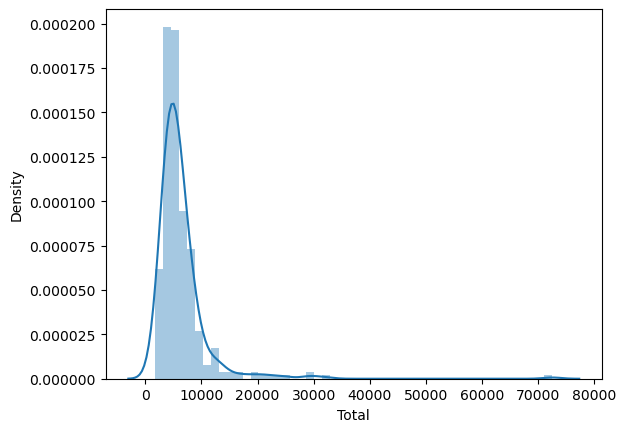

In [103]:
sns.distplot(test_df.Total)

<Axes: xlabel='Total', ylabel='Density'>

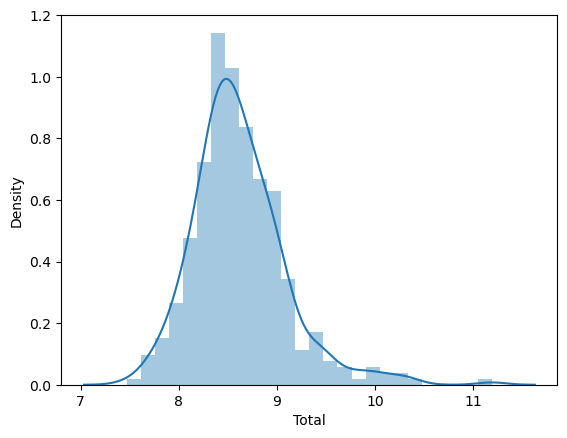

In [104]:
import numpy as np
sns.distplot(np.log(test_df.Total))

In [105]:
test_df['Log_Total'] = np.log(test_df.Total)

In [106]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total,Log_Total
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378


In [107]:
col_to_drop = ["Loan_ID","Gender","Self_Employed","ApplicantIncome","CoapplicantIncome","Total"]

In [108]:
test_df1 = test_df.drop(labels=col_to_drop,axis=1)

In [109]:
test_df1.head()

,Married,Dependents,Education,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Log_Total
0,Yes,0,Graduate,110.0,360.0,1.0,Urban,8.651724
1,Yes,1,Graduate,126.0,360.0,1.0,Urban,8.428581
2,Yes,2,Graduate,208.0,360.0,1.0,Urban,8.824678
3,Yes,2,Graduate,100.0,360.0,0.0,Urban,8.494129
4,No,0,Not Graduate,78.0,360.0,1.0,Urban,8.094378


In [110]:
cat,con = catcon(test_df1)

In [111]:
cat

['Married', 'Dependents', 'Education', 'Credit_History', 'Property_Area']

In [112]:
cat

['Married', 'Dependents', 'Education', 'Credit_History', 'Property_Area']

In [113]:
X1=pd.DataFrame(Global_MS.fit_transform(test_df1[con]),columns=con)
X2=pd.get_dummies(test_df1[cat])
X_test=X1.join(X2)

In [114]:
X_test.head()

,LoanAmount,Loan_Amount_Term,Log_Total,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.157088,0.746835,0.316956,0,1,1,0,0,0,1,0,0,1,0,0,1
1,0.187739,0.746835,0.256950,0,1,0,1,0,0,1,0,0,1,0,0,1
2,0.344828,0.746835,0.363465,0,1,0,0,1,0,1,0,0,1,0,0,1
3,0.137931,0.746835,0.274577,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0.095785,0.746835,0.167078,1,0,1,0,0,0,0,1,0,1,0,0,1


In [115]:
ts_pred=model.predict(X_test)

In [116]:
ts_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [117]:
X_test.shape

(367, 16)

In [118]:
df_final=test_df[["Loan_ID"]]

In [119]:
df_final["Predicted_value"]=ts_pred

In [120]:
df_final.shape

(367, 2)

In [121]:
df_final[df_final["Predicted_value"] == 1].shape

(222, 2)

# Out of 367 people 222 people Loan loan will be approved

In [122]:
df_final

,Loan_ID,Predicted_value
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,0
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,0
365,LP002986,1


In [123]:
df_final_y = df_final.replace([0, 1], ["N",'Y'])

In [124]:
df_final.to_csv("D:\Resume Projects\Loan Prediction\predicted_result.csv")

In [125]:
df_final_y.to_csv("D:\Resume Projects\Loan Prediction\predicted_result_y.csv")

In [126]:
df_final_y.head()

,Loan_ID,Predicted_value
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N


# END